<a href="https://colab.research.google.com/github/Yureeets/Intelligent-analysis-and-visualization-of-data/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Тема: перевірка гіпотез

## **Завдання**

1. Оберіть дані для аналізу
2. Задати та перевірити гіпотезу для змінної даних.
3. Задати та перевірити гіпотези в залежності від значень параметру.
4. Зробити висновки щодо своїх даних за допомогою тестування гіпотез.
5. Оформити звіт.


# **1. Оберіть дані для аналізу**

Отже для даної **лабораторної роботи** я обрав датасет, що містить в собі **інформацію про врожайності сільськогосподарських культур** в світі. Цей набір даних складається з **28242 записів** у семи колонках. Датасет складається з таких колонок як:
* Area (Країна)
* Item (Список типів продукції)
* Year (Рік)
* hg/ha_yiel (врожайність сільськогосподарських культур у гектограмах на гектар)
* average_rain_fall_mm_per_year (середньорічна кількість опадів у міліметрах)
* pesticides_tonnes (кількість використаних пестицидів, виміряна в тоннах)
* avg_temp (середня температура в градусах Цельсія)



## **Імпортуємо Бібліотеки**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math
import scipy

## **Імпортуємо Дані**

In [ ]:
# Завантажуємо з диску
!wget "https://drive.google.com/uc?export=download&id=1eUsG37AlzIk9PkGM1t-3SIIBpB9S3QcX" -O filename.zip

--2024-09-24 17:30:35--  https://drive.google.com/uc?export=download&id=1eUsG37AlzIk9PkGM1t-3SIIBpB9S3QcX
Resolving drive.google.com (drive.google.com)... 142.251.16.102, 142.251.16.100, 142.251.16.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eUsG37AlzIk9PkGM1t-3SIIBpB9S3QcX&export=download [following]
--2024-09-24 17:30:35--  https://drive.usercontent.google.com/download?id=1eUsG37AlzIk9PkGM1t-3SIIBpB9S3QcX&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.180.132, 2607:f8b0:4004:c21::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.180.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222032 (217K) [application/octet-stream]
Saving to: ‘filename.zip’

filename.zip        100%[===================>] 216.83K  --.-KB/s   

In [ ]:
!unzip -q /content/filename.zip

In [ ]:
# Імпортуємо Датасет
df = pd.read_csv('/content/yield_df.csv', index_col = 'Unnamed: 0')
df.head(8)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36


# **2. Задати та перевірити гіпотезу для змінної даних.**

Отже, ми маємо дані про врожайність сільськогосподарських культур в світі. Тому припустимо, що **середня врожайність пшениці для світу є 30000**. Альтернативна гіпотеза — **середня врожайність не рівна 30000**.  
Для тестування цієї гіпотези використаємо значення t-статистики, що обраховується як:
$$
\
t = \frac{\bar{X} - \mu_0}{\frac{s}{\sqrt{n}}}
\
$$

Де $ \bar{X} $ — це середнє значення вибірки, $ \mu_0 $ — це значення нульової гіпотези, \(s\) — середньоквадратичне відхилення, а $ n $ — це розмір вибірки.


In [ ]:
hyp = 30000

Напишемо вручну обрахунки t-статистики:

In [ ]:
x = df[(df['Item'] == 'Wheat')]['hg/ha_yield']

mean = x.mean()
n = len(x)
std = x.std()
t = (mean - hyp) / (std / math.sqrt(n))

print('t-statistic:', t)

t-statistic: 0.39269262647079634


In [ ]:
x

Та порахуємо P-значення:

In [ ]:
scipy.stats.t.sf(abs(t),df=len(x)-1) * 2

0.6945682232162192

Перевіримо вбудованою функцією:

In [ ]:
# обчислення t-статистики та p-value
scipy.stats.ttest_1samp(x, popmean = hyp)

TtestResult(statistic=0.39269262647079634, pvalue=0.6945682232162192, df=3856)

Отже, p-value=0.694 > 0.05 з чого ми можемо зробити висновок, що ми не можемо
відкинути нульову гіпотезу. Тобто 30000 є середньою врожайністю пшениці для світу.
Додатково перевіримо це на графіку:

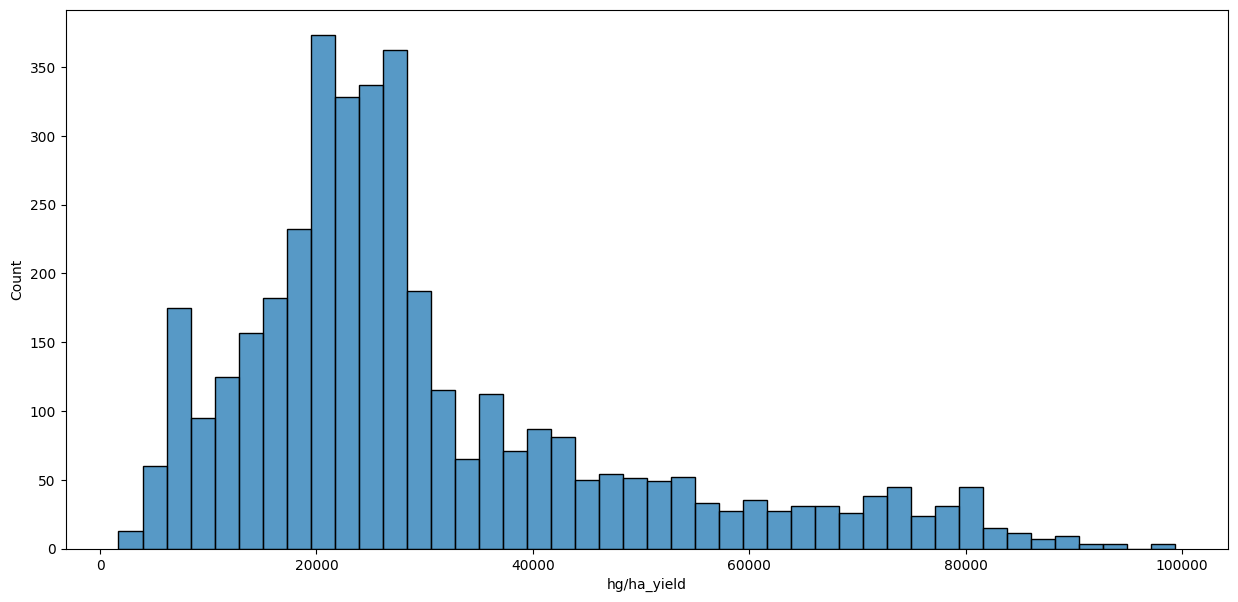

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(x)
plt.show()

# **3. Задати та перевірити гіпотези в залежності від значень параметру.**
Для цього завдання ми перевіримо, чи є статистично значуща різниця між середньою врожайністю при низькій та високій температурі.

Нульова гіпотеза (H0): Середня температура не впливає на врожайність.

Альтернативна гіпотеза (H1): Температура впливає на врожайність.

Для цього розділимо колонку врожайності по середині випадів:

In [ ]:
median_temp = df['avg_temp'].median()

group1 = df[df['avg_temp'] <= median_temp]['hg/ha_yield']

group2 = df[df['avg_temp'] > median_temp]['hg/ha_yield']

t_stat, p_value = scipy.stats.ttest_ind(group1, group2)

print(f"t-статистика: {t_stat:.2f}")
print(f"p-значення: {p_value:.2f}")
alpha = 0.05
if p_value < alpha:
    print("Є статистично значуща різниця у врожайності між двома групами (відхиляємо нульову гіпотезу).")
else:
    print("Немає статистично значущої різниці у врожайності між двома групами (не відхиляємо нульову гіпотезу).")

t-статистика: 15.12
p-значення: 0.00
Є статистично значуща різниця у врожайності між двома групами (відхиляємо нульову гіпотезу).


Отже, оскільки наше P-значення менше за 0.05 ми відхиляємо нульову гіпотезу, тобто робмо висновок, що температура впливає на врожайність. Перевіримо це на графіках:

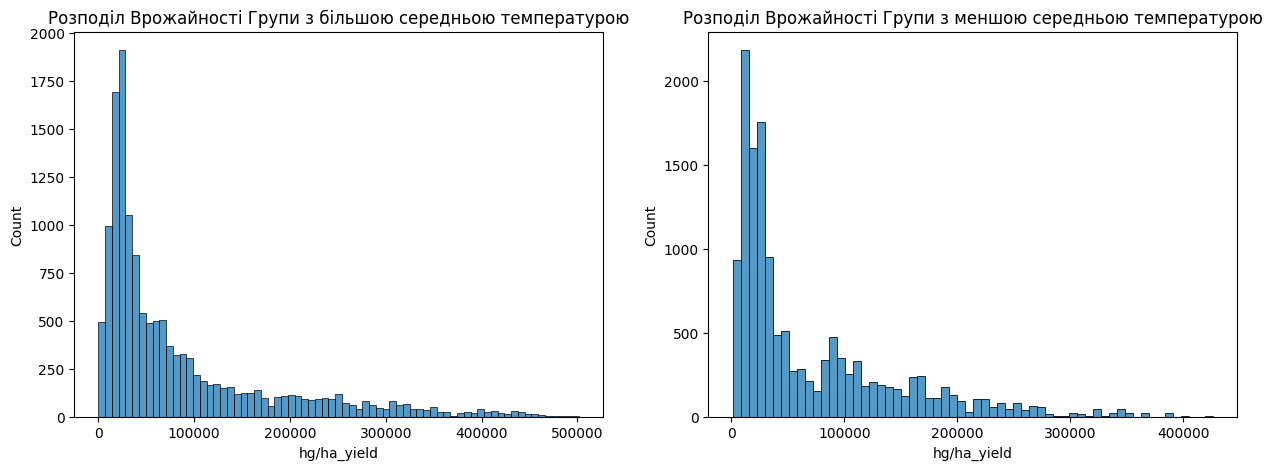

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Розподіл Врожайності Групи з більшою середньою температурою')
sns.histplot(group1)

plt.subplot(1,2,2)
sns.histplot(group2)
plt.title('Розподіл Врожайності Групи з меншою середньою температурою')

plt.show()

Як бачимо з гістограм, що врожайність з більшими опадами значно більша.

**Перевіримо ще одну гіпотезу з параметром:**

Перевіримо ще одну гіпотезу, порівняємо середні значення врожайності картоплі в Україні та Польщі.

Нульова гіпотеза (H0): Середні врожайності картоплі в Україні та Польщі однакові.

Альтернативна гіпотеза (H1): Середні врожайності картоплі в Україні та Польщі відрізняються.

In [ ]:
values_poland = df[(df['Area'] == 'Poland') & (df['Item'] == 'Potatoes')]['hg/ha_yield']
values_ukraine = df[(df['Area'] == 'Ukraine') & (df['Item'] == 'Potatoes')]['hg/ha_yield']

t_stat, p_value = scipy.stats.ttest_ind(values_ukraine, values_poland)

print(f"t-статистика: {t_stat:.2f}")
print(f"p-значення: {p_value:.2f}")

alpha = 0.05
if p_value < alpha:
    print("Є статистично значуща різниця у врожайності картоплі між Україною та Польщею (відхиляємо нульову гіпотезу).")
else:
    print("Немає статистично значущої різниці у врожайності картоплі між Україною та Польщею (не відхиляємо нульову гіпотезу).")

t-статистика: -7.86
p-значення: 0.00
Є статистично значуща різниця у врожайності картоплі між Україною та Польщею (відхиляємо нульову гіпотезу).


Оскільки 0.0 < 0.5, тому ми відкидаємо нульову гіпотезу, та можемо стверджувати, що середня врожайніть картоплі в Україні та Польщі значно відрізняються.

Перевіримо це на графіках:

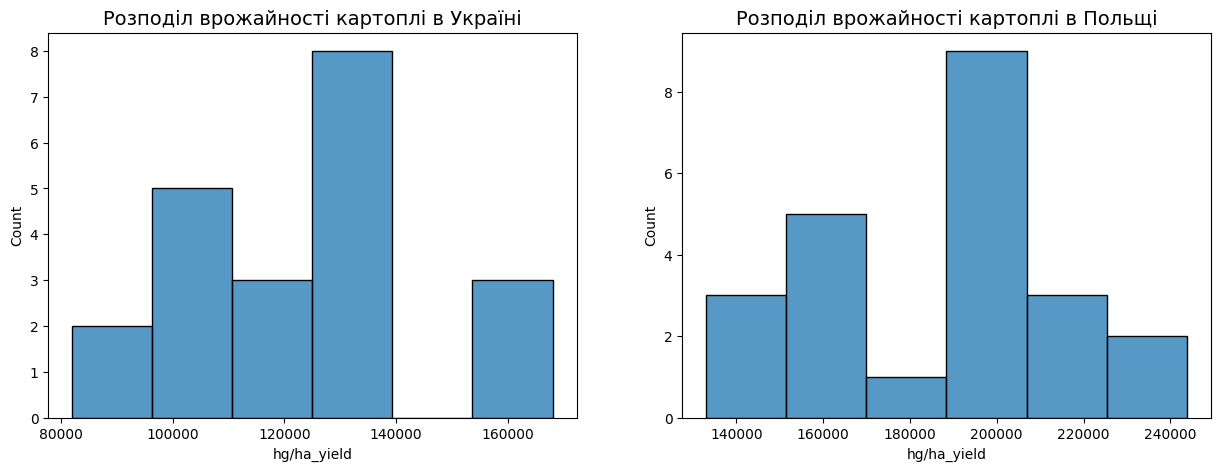

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Розподіл врожайності картоплі в Україні',fontsize = 14)
sns.histplot(values_ukraine)

plt.subplot(1,2,2)
plt.title('Розподіл врожайності картоплі в Польщі',fontsize = 14)
sns.histplot(values_poland)

plt.show()

Як бачимо з графіків значення врожайностей в Україні та Польще значно відрізняються, що лише підтверджує нашу гіпотезу.

# **4. Висновок**

У ході виконання даної лабораторної роботи було проаналізовано врожайність сільськогосподарських культур в Україні та Польщі на основі таких показників як t-статистика та P-значення. За допомогою побудованих графіків вдалося виявити суттєву різницю в показниках врожайності між цими країнами, що підтвердило початкову гіпотезу. Аналіз даних показав, що на врожайність значно впливають як кліматичні умови, так і економічні чинники. Отримані результати дозволяють краще зрозуміти відмінності у сільськогосподарському виробництві двох країн і можуть слугувати основою для подальшого дослідження впливу цих факторів на врожайність.